In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [188]:
data_file = 'immo.csv'
df = pd.read_csv(data_file)



In [378]:
df = pd.DataFrame(df)
df = df[['Type','Sub type', 'Price', 'NetHabitableSurface(msq)','street',  'ConstructionYear','BedroomCount', 'locality', 'FacadeCount', 'HeatingType', 'KitchekType']]
columns_to_n = ['Type', 'Sub type', 'street',  'locality', 'HeatingType', 'KitchekType']
columns_to_0 = ['Price', 'NetHabitableSurface(msq)', 'ConstructionYear', 'BedroomCount', 'FacadeCount']
df[columns_to_n] = df[columns_to_n].replace(np.nan, 'None')
df[columns_to_0] = df[columns_to_0].replace(np.nan, 0)

# age of building
list_years = []
for year in df['ConstructionYear']:
    years = 2022 - year
    list_years.append(years)
df = df.assign(ConstructionYear = list_years)

#encoder
labelencoder = LabelEncoder()
df['Type'] = labelencoder.fit_transform(df['Type'])

df['locality'] = labelencoder.fit_transform(df['locality'])
df['HeatingType'] = labelencoder.fit_transform(df['HeatingType'])
df['KitchekType'] = labelencoder.fit_transform(df['KitchekType'])
df['Sub type'] = labelencoder.fit_transform(df['Sub type'])
df['Sub type'] = labelencoder.fit_transform(df['Sub type'])
df['street'] = labelencoder.fit_transform(df['street'])



In [437]:

df.columns


Index(['Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)', 'street',
       'ConstructionYear', 'BedroomCount', 'locality', 'FacadeCount',
       'HeatingType', 'KitchekType', 'target'],
      dtype='object')

In [463]:
X = np.array(df[['Sub type', 'KitchekType','Price', 'HeatingType','NetHabitableSurface(msq)','street','BedroomCount','Type']])
y = np.array(df['FacadeCount'])


In [464]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,  test_size=0.2)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>, <AxesSubplot: >]],
      dtype=object)

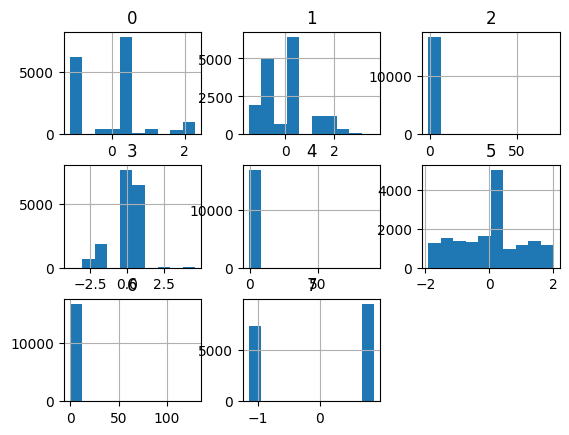

In [440]:
pd.DataFrame(X_train).hist()

# KNN

In [551]:
from sklearn.neighbors import KNeighborsClassifier

In [552]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_model.score(X_train,y_train)

0.6829007542911445

In [553]:
knn_predict = knn_model.predict(X_test)
knn_model.score(X_test, y_test)

0.5403800475059383

In [554]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.72      0.65      1516
         1.0       0.23      0.06      0.10        50
         2.0       0.49      0.55      0.52      1248
         3.0       0.43      0.29      0.34       693
         4.0       0.58      0.43      0.49       702
         6.0       0.00      0.00      0.00         1

    accuracy                           0.54      4210
   macro avg       0.39      0.34      0.35      4210
weighted avg       0.53      0.54      0.53      4210



C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

<AxesSubplot: >

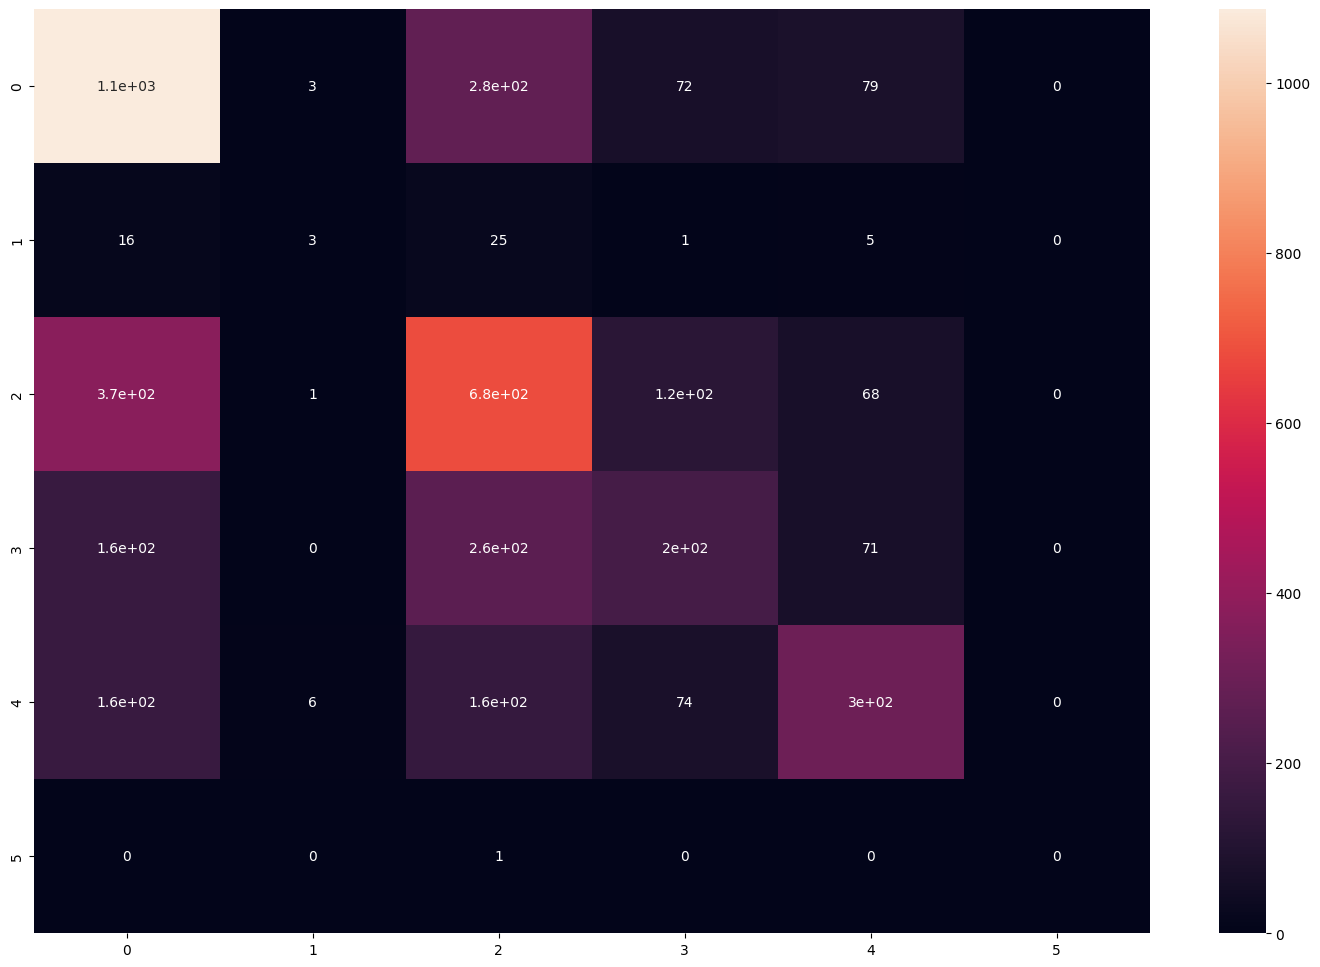

In [416]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predict = knn_model.predict(X_test)
con_ma = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(18,12))
sn.heatmap(con_ma, annot=True)

# linear regression

In [548]:
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_train, y_train)

0.17409628893501383

In [549]:
linear_predict =regression.predict(X_test)
regression.score(X_test, y_test)

0.1814324079248516

# random tree

In [483]:
from sklearn.ensemble import RandomForestClassifier
rt_model = RandomForestClassifier()
rt_model.fit(X_train, y_train)
rt_model.score(X_train,y_train)

0.9976242798598325

In [484]:
rt_model.predict(X_test)
rt_model.score(X_test, y_test)

0.5453681710213777

<AxesSubplot: >

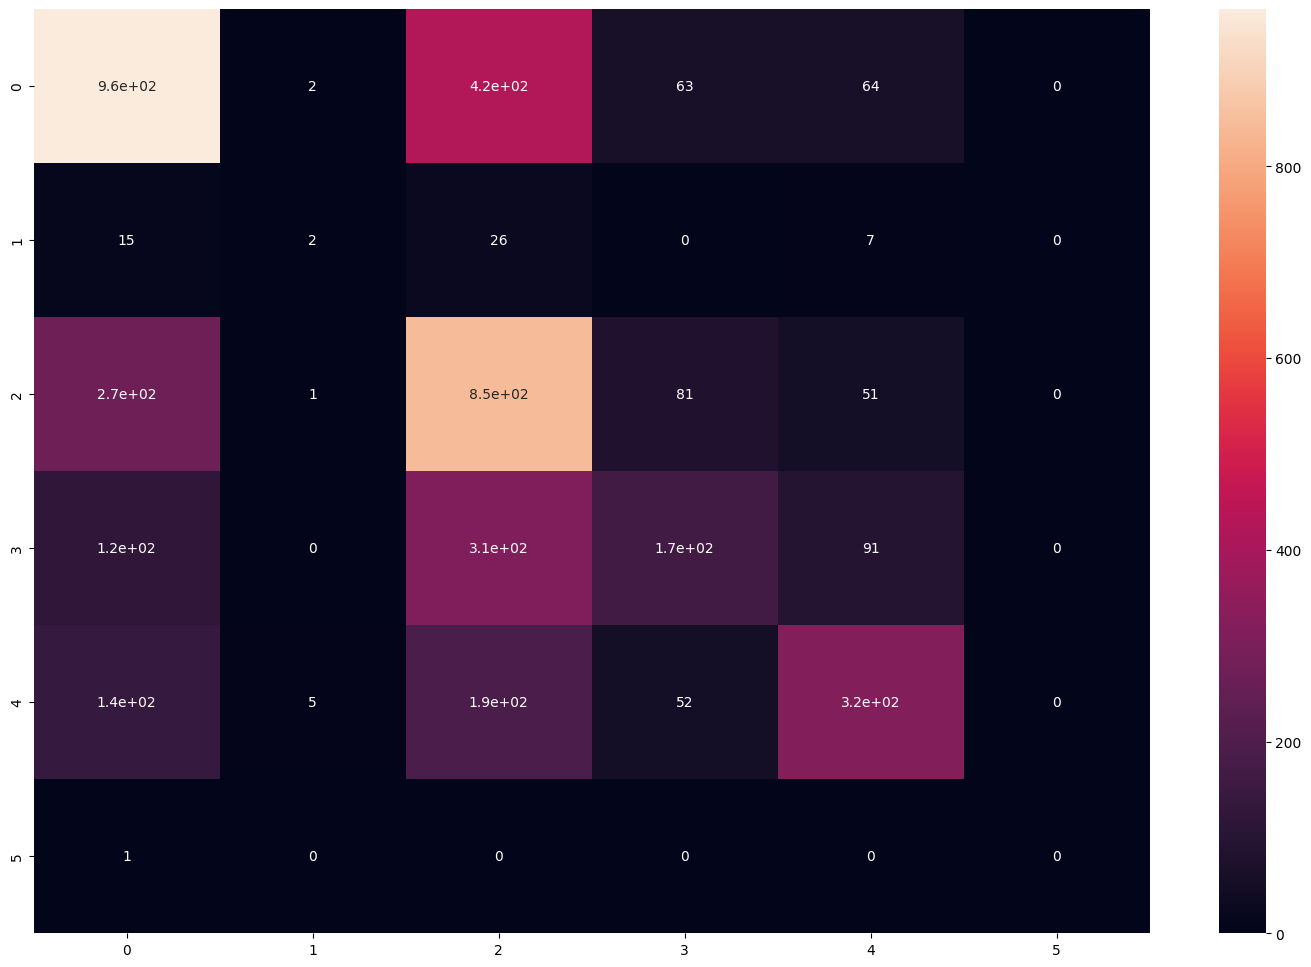

In [485]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predict = rt_model.predict(X_test)
con_ma1 = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(18,12))
sn.heatmap(con_ma1, annot=True)

In [492]:
from sklearn.tree import DecisionTreeClassifier

In [498]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.9977193538169148

In [505]:
predict = clf.predict(X_test)
clf.score(X_test, y_test)  #predict score

0.4420372481946028

In [510]:
from sklearn.metrics import recall_score
recall_score(y_test,predict, average='micro')

0.4420372481946028

In [506]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict,labels=[0,1])

array([[1006,    7],
       [  16,    6]], dtype=int64)

In [508]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55      1889
         1.0       0.10      0.11      0.11        56
         2.0       0.43      0.48      0.45      1578
         3.0       0.30      0.28      0.29       866
         4.0       0.36      0.36      0.36       872
         6.0       0.00      0.00      0.00         1

    accuracy                           0.44      5262
   macro avg       0.29      0.29      0.29      5262
weighted avg       0.44      0.44      0.44      5262



C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

<AxesSubplot: >

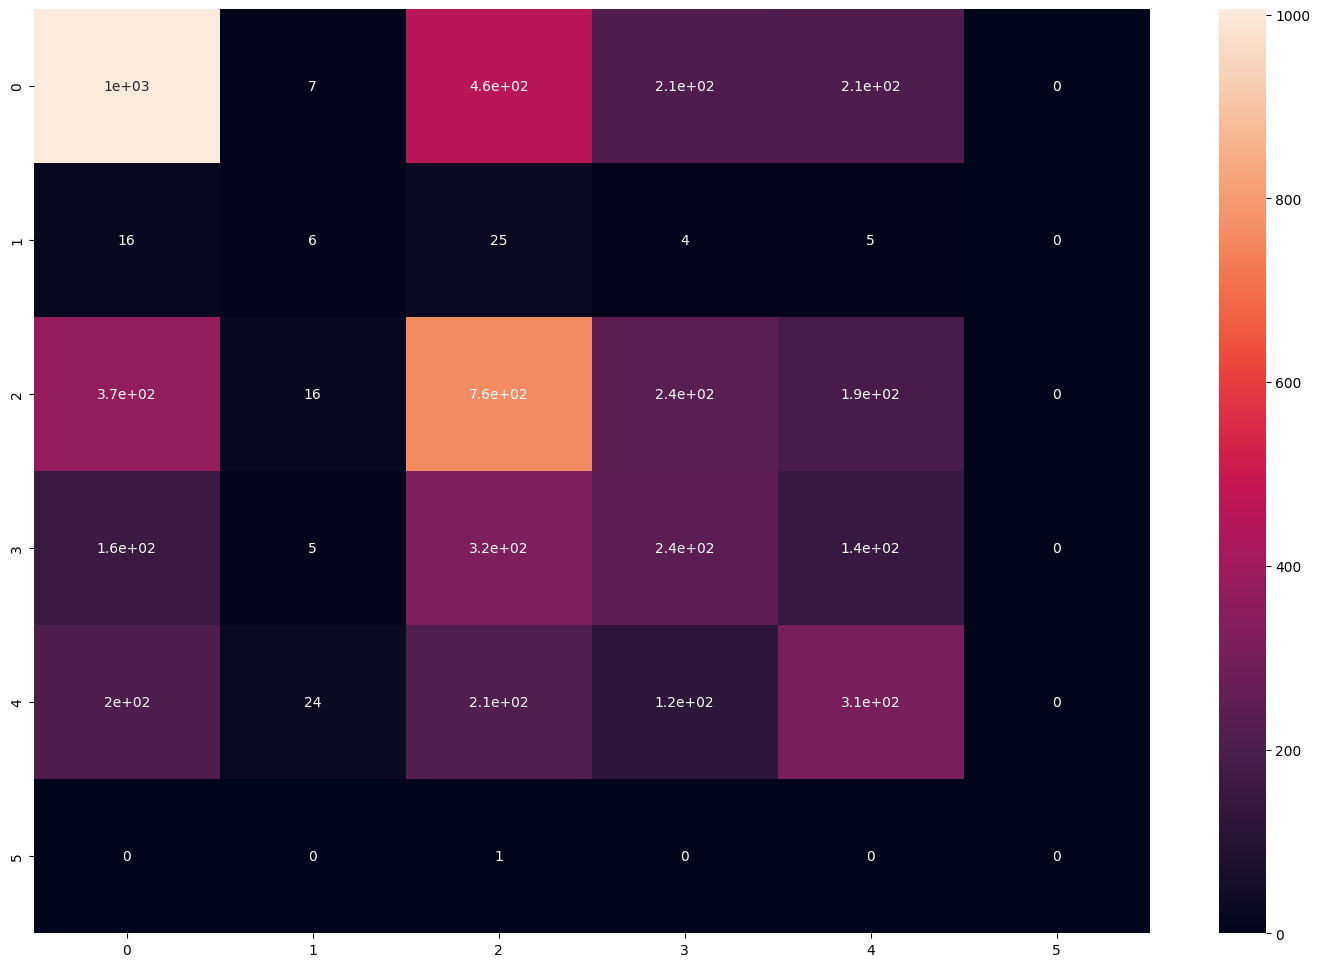

In [512]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
con_ma2 = confusion_matrix(y_test, predict)
plt.figure(figsize=(18,12))
sn.heatmap(con_ma2, annot=True)

# svm

In [544]:
from sklearn.svm import SVC
svc_model = SVC(C=10)
svc_model.fit(X_train, y_train)
svc_model.score(X_train,y_train)

0.5519985745679159

In [545]:
svg_predict = svc_model.predict(X_test)
svc_model.score(X_test, y_test)

0.5140142517814726

In [547]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svg_predict))

              precision    recall  f1-score   support

         0.0       0.58      0.66      0.62      1516
         1.0       0.22      0.08      0.12        50
         2.0       0.45      0.64      0.53      1248
         3.0       0.46      0.17      0.25       693
         4.0       0.56      0.34      0.42       702
         6.0       0.00      0.00      0.00         1

    accuracy                           0.51      4210
   macro avg       0.38      0.32      0.32      4210
weighted avg       0.51      0.51      0.49      4210



C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\woyay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

<AxesSubplot: >

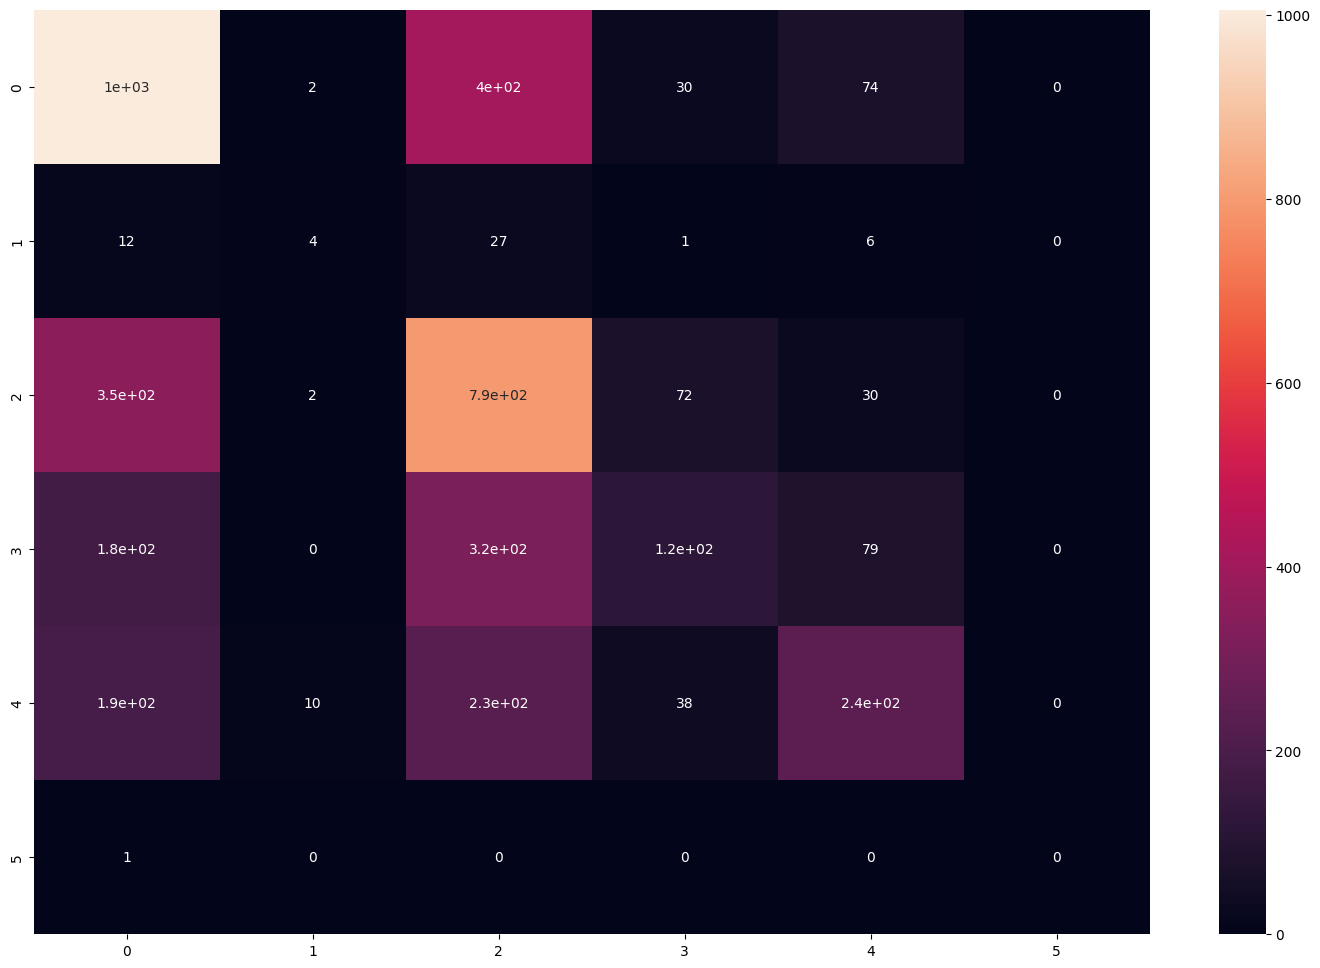

In [543]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, svg_predict)
plt.figure(figsize=(18,12))
sn.heatmap(cm, annot=True)